In [1]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('car_data.csv')
df.head()

,buying,maint,doors,persons,lug_boot,safety,class_value
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0


In [12]:
df['class_value'].value_counts()

class_value
0    1210
1     384
2      69
3      65
Name: count, dtype: int64

In [13]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'class_value'],
      dtype='object')

In [14]:
#class value haricinde numpy array oluşturma
X = df[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']].values
X[0:3] # ekrana yazılan veri sayısı

array([[3, 3, 2, 2, 0, 0],
       [3, 3, 2, 2, 0, 1],
       [3, 3, 2, 2, 0, 2]], dtype=int64)

In [15]:
y= df['class_value'].values
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [16]:
X, y = make_hastie_10_2(random_state=0)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=3) #veri setinin yüzde 30u test yüzde 70i eğitim için kullanılacaktır

In [18]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

!!!     slayta eklenmeyecek verilerin nereden geldiğini görün diye yaptım       !!!

n_estimators: Oluşturulacak olan zayıf tahmincilerin (ağaçların) sayısıdır. Daha fazla ağaç genellikle daha iyi bir performansa yol açabilir, ancak daha fazla hesaplama gücü gerektirir. 100 ağaç, genellikle başlangıç için iyi bir seçimdir.

learning_rate: Her ağacın katkısının büyüklüğünü kontrol eden bir hiperparametredir. Daha küçük bir öğrenme oranı, daha kararlı bir model oluşturabilir ancak daha fazla ağaca ihtiyaç duyulabilir. Öğrenme oranı, ağaçların tahminlerinin toplam sonuçtaki ağırlığını belirler. 1.0, her ağacın tam katkıda bulunduğu varsayımına dayanır. Daha küçük bir değer, her ağacın katkısını azaltırken, daha büyük bir değer ise her ağacın katkısını artırır.

max_depth: Karar ağaçlarının (zayıf tahmincilerin) maksimum derinliğini belirler. Derin ağaçlar daha karmaşık modeller oluşturabilir ancak aşırı uyum riskini artırabilir. max_depth=1, zayıf tahmincilerin yalnızca tek bir bölünme yapabileceği çok basit ağaçlar oluşturur.

random_state: Rastgele sayı üretecinin başlangıç durumunu belirler. Bu, modelin tekrarlanabilirliğini sağlar. Aynı random_state değeri kullanıldığında, her çalıştırıldığında aynı modeli elde edersiniz.

In [19]:
clf

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [20]:
clf.score(X_test, y_test)

0.9213888888888889

ilk denememizde %92 oranında başarı sağladık.
optimum değerleri bulmak için GridSearchCV faydalanmak istiyoruz

In [12]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'max_depth': [3, 5, 7, 9]
}

In [ ]:
grid_search = GridSearchCV(clf, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

In [ ]:
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi doğruluk:", grid_search.best_score_)

En iyi parametreler: {'learning_rate': 0.5, 'max_depth': 3}
En iyi doğruluk: 0.9354761904761905

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(params, scores, marker='o', linestyle='-')
plt.scatter(best_index, best_score, color='red', label='En İyi', zorder=5)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Parametreler')
plt.ylabel('Doğruluk')
plt.title('GridSearchCV Sonuçları')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#hocam ufak bir not bu kodları pycharm üzerinde yaptık. buradan çalıştırmayı denedik ama çok uzun sürdü o yüzden resim ve kodları ekledik

NameError: name 'plt' is not defined

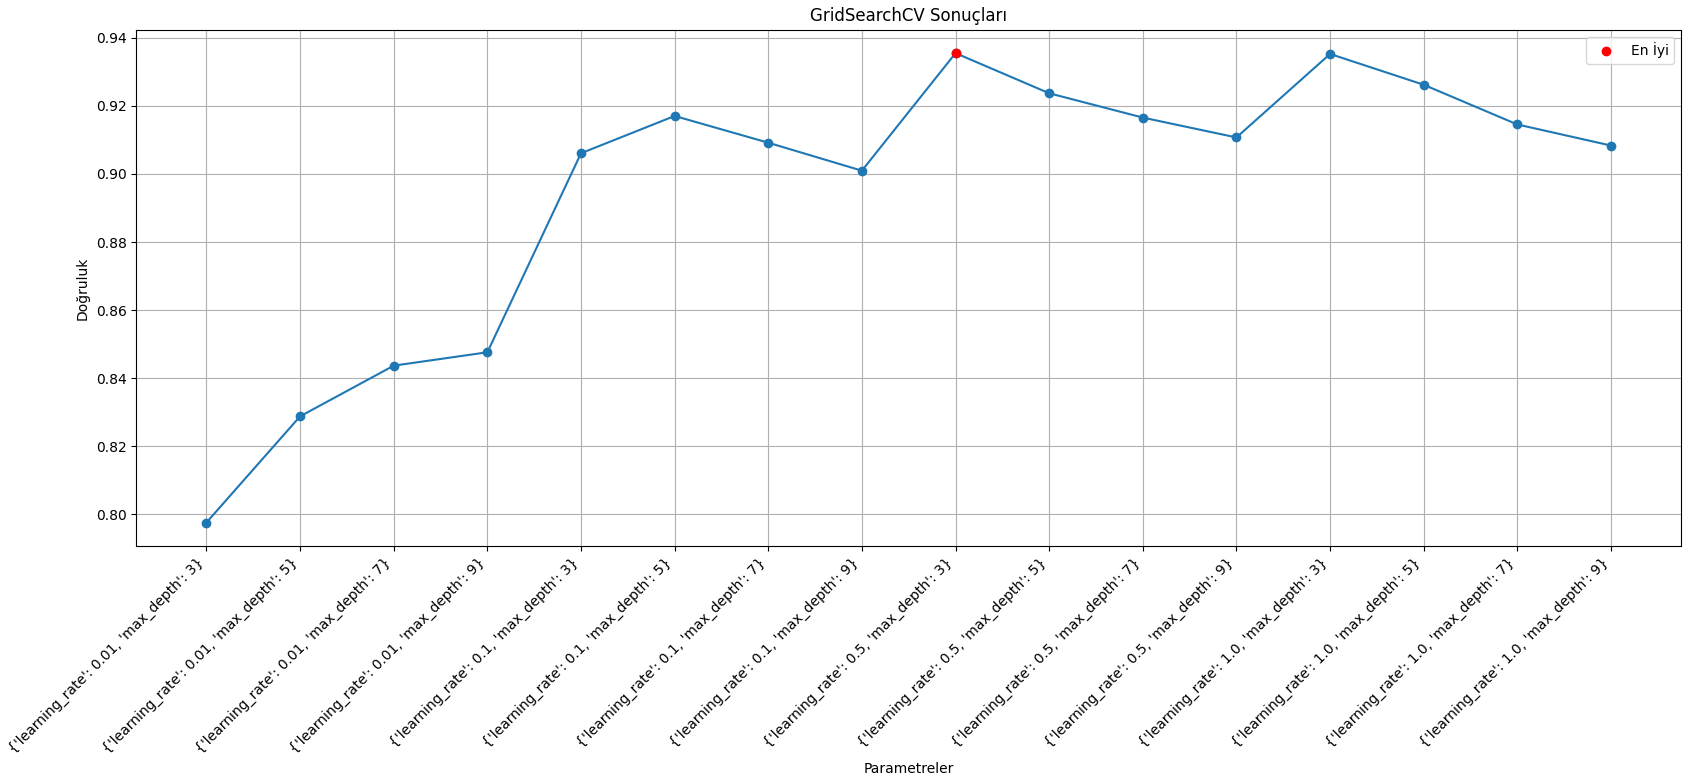